In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
from sklearn import linear_model

Couldn't import dot_parser, loading of dot files will not be possible.
Using gpu device 0: GeForce GTX TITAN X (CNMeM is enabled)


We have 50000 training, 10000 validation, and 10000 test examples
The examples are pairs of (u'features', u'targets'):
The source #0 named "features" is a 4d array with axis: (u'batch', u'channel', u'height', u'width')
The source #1 named "targets" is a 2d array with axis: (u'batch', u'index')


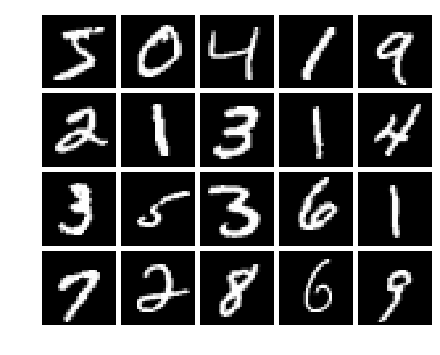

In [3]:
from fuel.datasets.mnist import MNIST
from common.plotting import plot_mat

mnist_train = MNIST(("train",), subset=slice(None,50000))
mnist_validation = MNIST(("train",), subset=slice(50000, None))
mnist_test = MNIST(("test",))

print "We have %d training, %d validation, and %d test examples" % (
    mnist_train.num_examples, mnist_validation.num_examples, mnist_test.num_examples)
print "The examples are pairs of %s:" % (mnist_train.sources,)
for i, source in enumerate(mnist_train.sources):
    labels = mnist_train.axis_labels[source]
    print 'The source #%d named "%s" is a %dd array with axis: %s' % (
        i, source, len(labels), labels)

#Note that for larger datasets that are loaded into mameory the data_sources field may not exist!
plot_mat(mnist_train.data_sources[0][:20], cmap='gray')

In [4]:
mnist_train_X = (mnist_train.data_sources[0].reshape(mnist_train.num_examples, -1) / 255.0).astype(np.single)
mnist_train_Y = mnist_train.data_sources[1].ravel()

mnist_valid_X = (mnist_validation.data_sources[0].reshape(mnist_validation.num_examples, -1) / 255.0).astype(np.single)
mnist_valid_Y = mnist_validation.data_sources[1].ravel()

mnist_test_X = (mnist_test.data_sources[0].reshape(mnist_test.num_examples, -1) / 255.0).astype(np.single)
mnist_test_Y = mnist_test.data_sources[1].ravel()

In [5]:
sigma_W = 0.3
num_hidden = 20000
C = 2.0

num_features = mnist_train_X.shape[1]
rand_W = np.random.randn(num_features, num_hidden) * sigma_W

def rand_net(X):
    return np.tanh(1.3 * X.dot(rand_W)) # we will see why the 1.3 later on!

mnist_train_H = rand_net(mnist_train_X)

softmax = linear_model.LogisticRegression(C=C, solver='lbfgs')
softmax.fit(mnist_train_H, mnist_train_Y)
print sigma_W, C, (softmax.predict(rand_net(mnist_valid_X)) == mnist_valid_Y).mean()

print "Testing accurracy:", (softmax.predict(rand_net(mnist_test_X)) == mnist_test_Y).mean()

0.3 2.0 0.9799
Testing accurracy: 0.9797
